# TASK #1: IMPORT LIBRARIES AND DATASET

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# read the csv file 
admission = pd.read_csv('Admission_Predict.csv')

In [40]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
# drop the serial no.
admission.drop('Serial No.', axis = 1, inplace = True)

In [42]:
admission

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# TASK #2: PERFORM EXPLORATORY DATA ANALYSIS

In [43]:
# checking the null values
admission.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [44]:
# Check the dataframe information
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [45]:
# Statistical summary of the dataframe
admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [46]:
# Grouping by University ranking 
university = admission.groupby(by = 'University Rating').mean()

In [47]:
university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK #3: PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

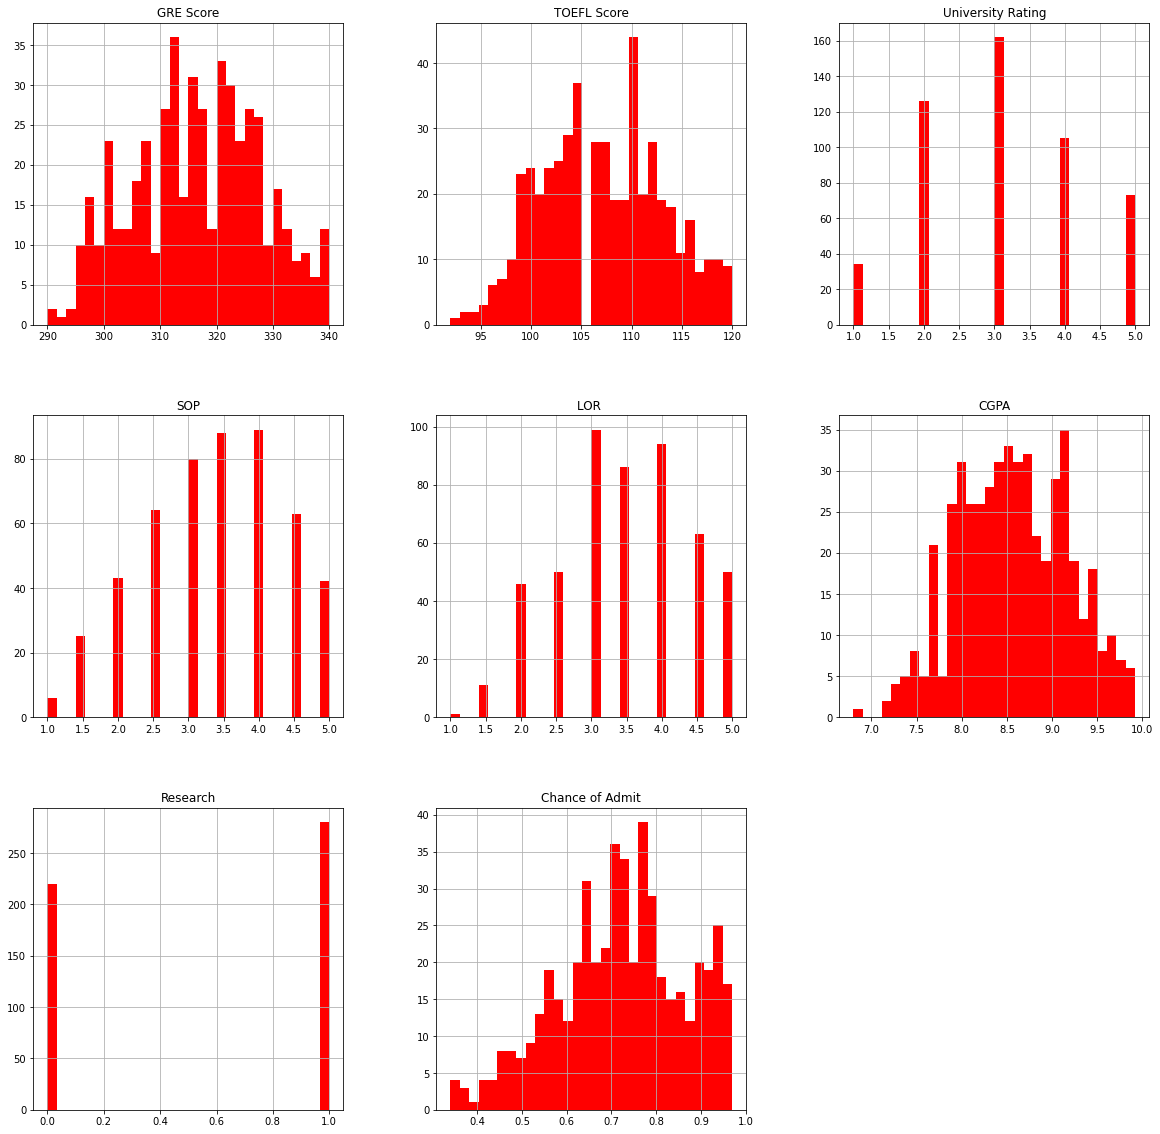

In [48]:
admission.hist(bins = 30, figsize = (20,20), color = 'red')

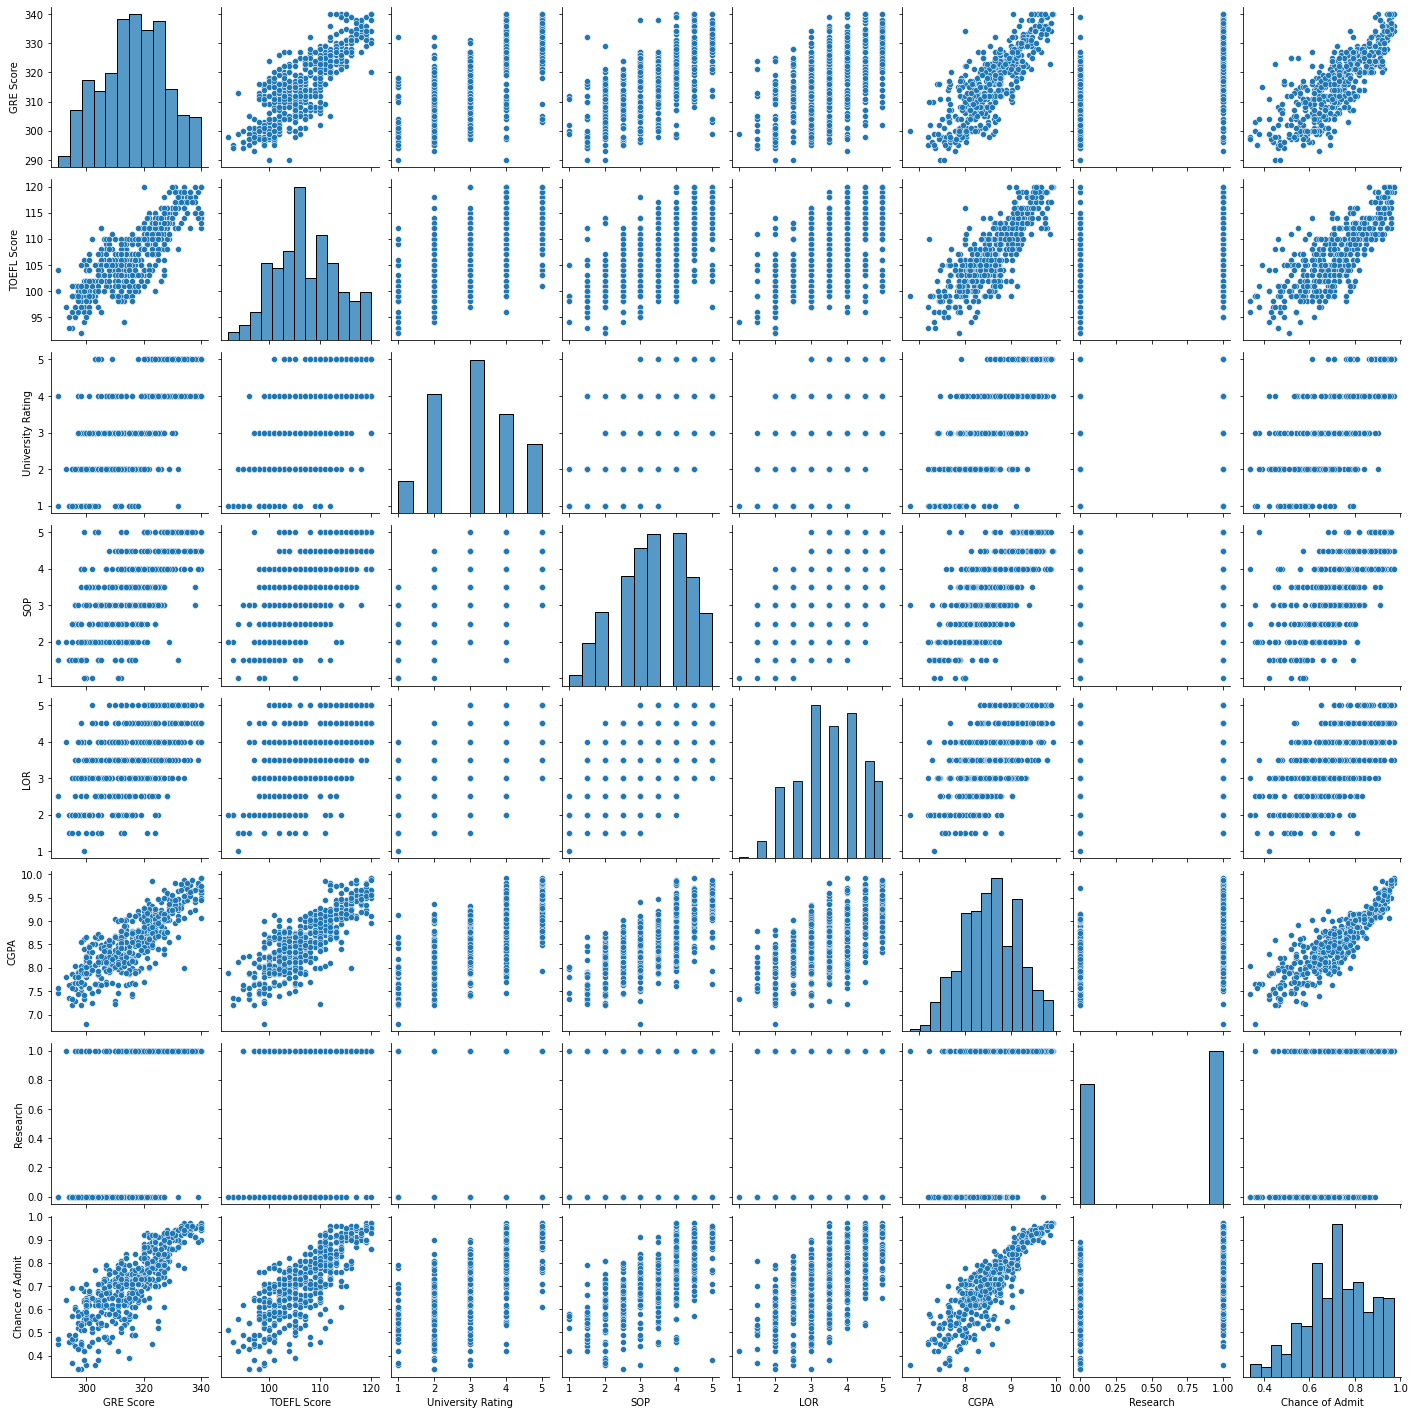

In [49]:
sns.pairplot(admission)

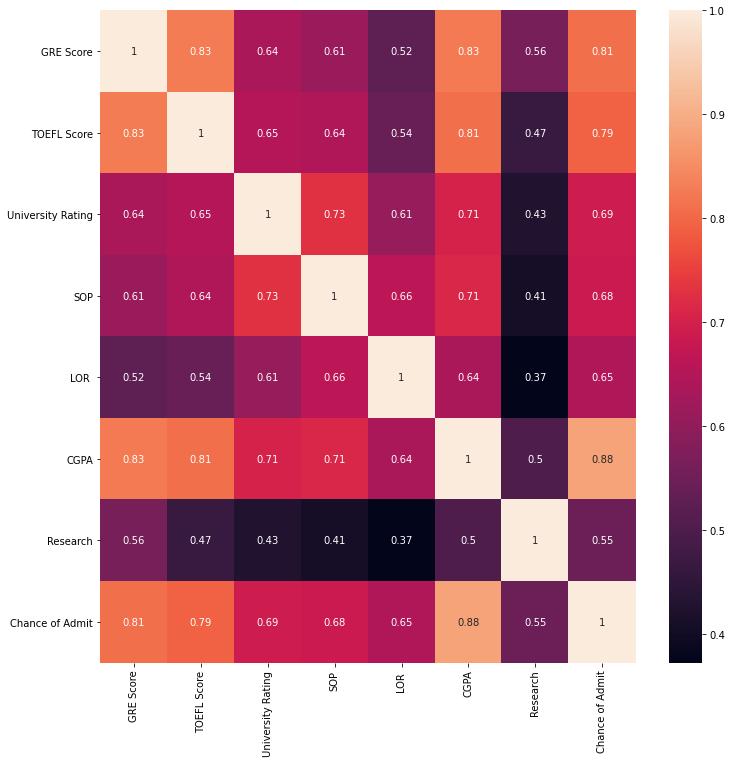

In [50]:

corr_matrix = admission.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [51]:
x = admission.drop(columns = ['Chance of Admit'])
y = admission['Chance of Admit']

In [52]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1, 1)

In [53]:
import sklearn

In [54]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [55]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15) 

# TASK #5: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [57]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
print(accuracy_LinearRegression)

0.8305648152911806


# TASK #6: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [59]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                400       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [60]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [61]:
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Train on 340 samples, validate on 85 samples
Epoch 1/100
340/340 [==============================] - 1s 3ms/sample - loss: 0.5893 - val_loss: 0.2887
Epoch 2/100
340/340 [==============================] - 0s 234us/sample - loss: 0.3716 - val_loss: 0.3204
Epoch 3/100
340/340 [==============================] - 0s 208us/sample - loss: 0.3088 - val_loss: 0.2750
Epoch 4/100
340/340 [==============================] - 0s 196us/sample - loss: 0.2745 - val_loss: 0.2765
Epoch 5/100
340/340 [==============================] - 0s 218us/sample - loss: 0.2692 - val_loss: 0.2560
Epoch 6/100
340/340 [==============================] - 0s 206us/sample - loss: 0.2704 - val_loss: 0.2882
Epoch 7/100
340/340 [==============================] - 0s 200us/sample - loss: 0.2523 - val_loss: 0.3042
Epoch 8/100
340/340 [==============================] - 0s 196us/sample - loss: 0.2524 - val_loss: 0.2319
Epoch 9/100
340/340 [==============================] - 0s 231us/sample - loss: 0.2365 - val_loss: 0.2559
Epoch 10/100

Epoch 78/100
340/340 [==============================] - 0s 236us/sample - loss: 0.1252 - val_loss: 0.2493
Epoch 79/100
340/340 [==============================] - 0s 191us/sample - loss: 0.1387 - val_loss: 0.2526
Epoch 80/100
340/340 [==============================] - 0s 198us/sample - loss: 0.1436 - val_loss: 0.3048
Epoch 81/100
340/340 [==============================] - 0s 219us/sample - loss: 0.1233 - val_loss: 0.2305
Epoch 82/100
340/340 [==============================] - 0s 200us/sample - loss: 0.1160 - val_loss: 0.3094
Epoch 83/100
340/340 [==============================] - 0s 206us/sample - loss: 0.1129 - val_loss: 0.2707
Epoch 84/100
340/340 [==============================] - 0s 198us/sample - loss: 0.1240 - val_loss: 0.2619
Epoch 85/100
340/340 [==============================] - 0s 219us/sample - loss: 0.1183 - val_loss: 0.2593
Epoch 86/100
340/340 [==============================] - 0s 206us/sample - loss: 0.1146 - val_loss: 0.2691
Epoch 87/100
340/340 [========================

In [62]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN)) 

75/75 [==============================] - 0s 0s/sample - loss: 0.2035
Accuracy : 0.7965361871321996


In [63]:
epochs_hist.history.keys() 

dict_keys(['loss', 'val_loss'])

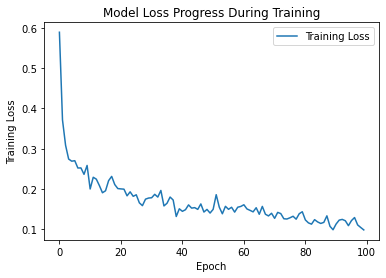

In [64]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #7: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [65]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree 
# is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train, y_train) 

DecisionTreeRegressor()

In [66]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
print(accuracy_DecisionTree) 

0.5735072619106789


In [67]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the 
# dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(x_train, np.ravel(y_train))

RandomForestRegressor()

In [68]:
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
print(accuracy_RandomForest)

0.7849518672867184


# TASK #8: CALCULATE REGRESSION MODEL KPIs

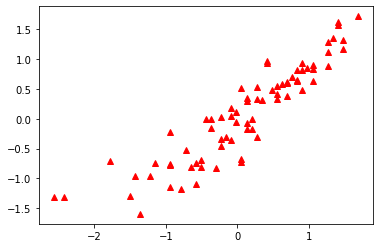

In [69]:
y_predict = LinearRegression_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'red') 

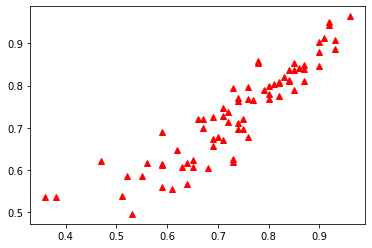

In [70]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'red')

In [71]:
k = x_test.shape[1] 
n = len(x_test)
n 

75

In [72]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.053 
MSE = 0.0027878157429439693 
MAE = 0.03964752601300867 
R2 = 0.8305648152911806 
Adjusted R2 = 0.8128626318141399
